# Model Training

### EDA Conclusion:

### Conclusion
- We will not use number of social media use as it clearly not the correct indication
- We will only have 3 catagories in Gender M,F,Others because the dataset is dominated by male and female others are very negligible.
- females tends to have more depression and sleep issue. we will try look at the clustering else we will select depression as target variable.
- bother and distracted are mildly corelated (0.66)
- how do you feel about comparisons, reddit,youtube,dicord are not corelated to "depression"

##### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# warning
import warnings
warnings.filterwarnings("ignore")

### Dataset transformation

In [2]:
df = pd.read_csv("D:\Mental Health Predictor\mental health data\social midia and mental health\mental_health_data_processed.csv")

In [3]:
df.head()

,age,gender,relationship,Occupation Status,use social media,average time spend on social media,using Social media without a specific purpose,distracted by Social media while working,feel restless if haven't used Social media in a while,how easily distracted are you,...,sleep issue,facebook,instagram,youtube,snapchat,reddit,discord,pinterest,tiktok,social_media_count
0,21.0,m,In a relationship,University Student,Yes,Between 2 and 3 hours,5,3,2,5,...,5,1,1,1,0,1,1,0,0,5
1,21.0,f,Single,University Student,Yes,More than 5 hours,4,3,2,4,...,5,1,1,1,0,1,1,0,0,5
2,21.0,f,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,...,5,1,1,1,0,0,0,1,0,4
3,21.0,f,Single,University Student,Yes,More than 5 hours,4,2,1,3,...,2,1,1,0,0,0,0,0,0,2
4,21.0,f,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,...,1,1,1,1,0,0,0,0,0,3


In [4]:
df = df.drop(columns= ["social_media_count","tiktok","facebook","reddit","how do you feel about these comparisons"
                       ,"pinterest","youtube","discord"])

In [5]:
df.columns

Index(['age', 'gender', 'relationship', 'Occupation Status',
       'use social media', 'average time spend on social media',
       'using Social media without a specific purpose',
       'distracted by Social media while working',
       'feel restless if haven't used Social media in a while',
       'how easily distracted are you', 'how much are you bothered by worries',
       'find it difficult to concentrate on things',
       'how often do you compare yourself',
       'seek validation from features of social media',
       'feel depressed or down', 'how frequently interest fluctuate daily',
       'sleep issue', 'instagram', 'snapchat'],
      dtype='object')

- Changing age datatype to int

In [6]:
df["age"]= df["age"].astype(int)

- converting gender column to only 3 catagory

In [7]:
df["gender"].unique()

array(['m', 'f', 'nb', 'unsure', 'Trans'], dtype=object)

In [8]:
changes = {"nb":"others","unsure":"others","Trans":"others"}
df["gender"].replace(changes, inplace=True)

In [9]:
df["gender"].unique()

array(['m', 'f', 'others'], dtype=object)

### Depression is our target varible.

In [10]:
df.shape

(481, 19)

In [11]:
# Splitting dataset in X and Y
X = df.drop("feel depressed or down", axis=1)
Y = df["feel depressed or down"]

In [12]:
X.shape,Y.shape

((481, 18), (481,))

### Data preprocessing

In [13]:
X.dtypes

age                                                       int64
gender                                                   object
relationship                                             object
Occupation Status                                        object
use social media                                         object
average time spend on social media                       object
using Social media without a specific purpose             int64
distracted by Social media while working                  int64
feel restless if haven't used Social media in a while     int64
how easily distracted are you                             int64
how much are you bothered by worries                      int64
find it difficult to concentrate on things                int64
how often do you compare yourself                         int64
seek validation from features of social media             int64
how frequently interest fluctuate daily                   int64
sleep issue                             

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

numeric_cols = ["age"]
categorical_cols = X.select_dtypes(include="object").columns.drop("average time spend on social media")
avg_time_spend = "average time spend on social media"

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("OHE_avg_time", OneHotEncoder(), [avg_time_spend]),
        ("Ordinal_cat", OrdinalEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # keeps the other columns
)


- Before column transformer

In [15]:
X.head()

,age,gender,relationship,Occupation Status,use social media,average time spend on social media,using Social media without a specific purpose,distracted by Social media while working,feel restless if haven't used Social media in a while,how easily distracted are you,how much are you bothered by worries,find it difficult to concentrate on things,how often do you compare yourself,seek validation from features of social media,how frequently interest fluctuate daily,sleep issue,instagram,snapchat
0,21,m,In a relationship,University Student,Yes,Between 2 and 3 hours,5,3,2,5,2,5,2,2,4,5,1,0
1,21,f,Single,University Student,Yes,More than 5 hours,4,3,2,4,5,4,5,1,4,5,1,0
2,21,f,Single,University Student,Yes,Between 3 and 4 hours,3,2,1,2,5,4,3,1,2,5,1,0
3,21,f,Single,University Student,Yes,More than 5 hours,4,2,1,3,5,3,5,2,3,2,1,0
4,21,f,Single,University Student,Yes,Between 2 and 3 hours,3,5,4,4,5,5,3,3,4,1,1,0


- After column transformer

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(481, 23)

In [18]:
X[0]

array([-0.5184509,  0.       ,  1.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  1.       ,  1.       ,  3.       ,
        1.       ,  5.       ,  3.       ,  2.       ,  5.       ,
        2.       ,  5.       ,  2.       ,  2.       ,  4.       ,
        5.       ,  1.       ,  0.       ])

- Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,test_size=0.25)

In [20]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((360, 23), (121, 23), (360,), (121,))

- Model evaluation

In [21]:
from sklearn.metrics import root_mean_squared_error, mean_squared_error,r2_score

In [22]:
def evaluate_model(pred,test):
    mse = mean_squared_error(pred,test)
    rmse = root_mean_squared_error(pred,test)
    r2_squre = r2_score(pred,test)
    return mse,rmse,r2_squre


- All Models

In [23]:
# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [24]:
models ={
    "K neighbour":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Foreset":RandomForestClassifier(),
    "Ada Boost":AdaBoostClassifier(),
    "Support vector classfier":SVC(),
    "Cat boost":CatBoostClassifier(verbose=False),
}

In [25]:
list(models)

['K neighbour',
 'Decision Tree',
 'Random Foreset',
 'Ada Boost',
 'Support vector classfier',
 'Cat boost']

In [26]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

K neighbour
Model performance for Training set
- Root Mean Squared Error: 1.0247
- Mean Absolute Error: 1.0500
- R2 Score: 0.3647
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2129
- Mean Absolute Error: 1.4711
- R2 Score: 0.2342


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.3817
- Mean Absolute Error: 1.9091
- R2 Score: 0.0062


Random Foreset
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.1677
- Mean Absolute Error: 1.3636
- R2 Score: 0.2902


Ada Boost
Model performance for Training set
- Root Mean Squared Error: 1.1316
- Mean Absolute Error: 1.2806
- R2 Score: 0.2252
------------------------

## Every Classification model perform horrible on this dataset So I've tried clustering


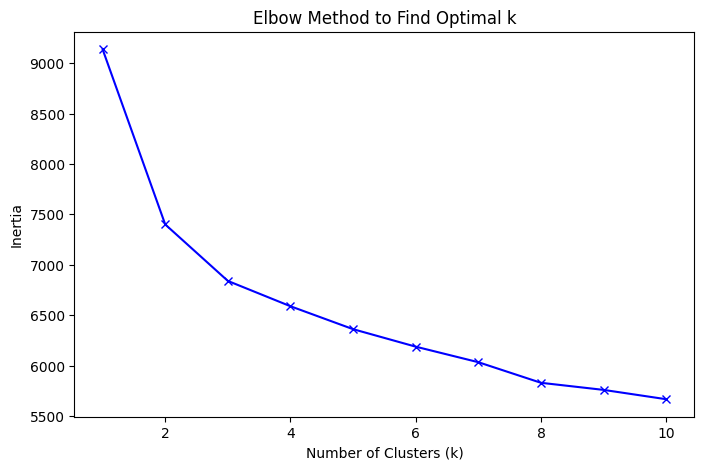

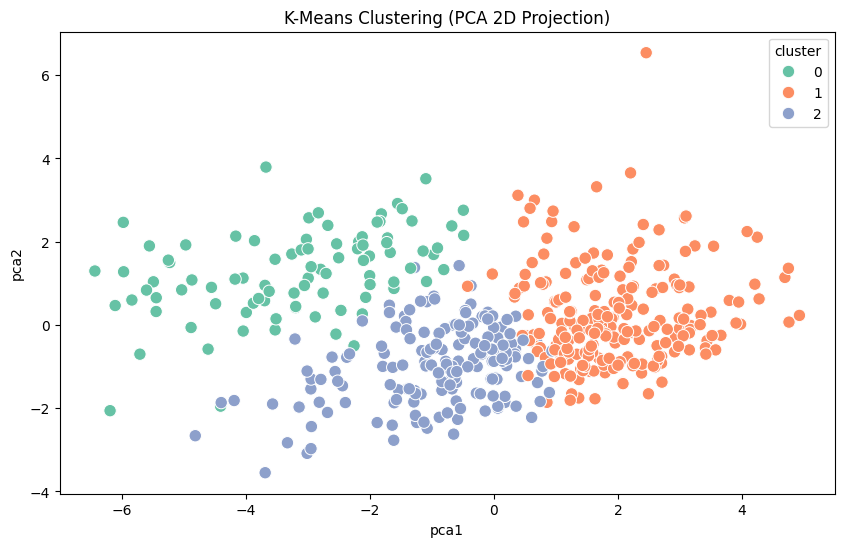

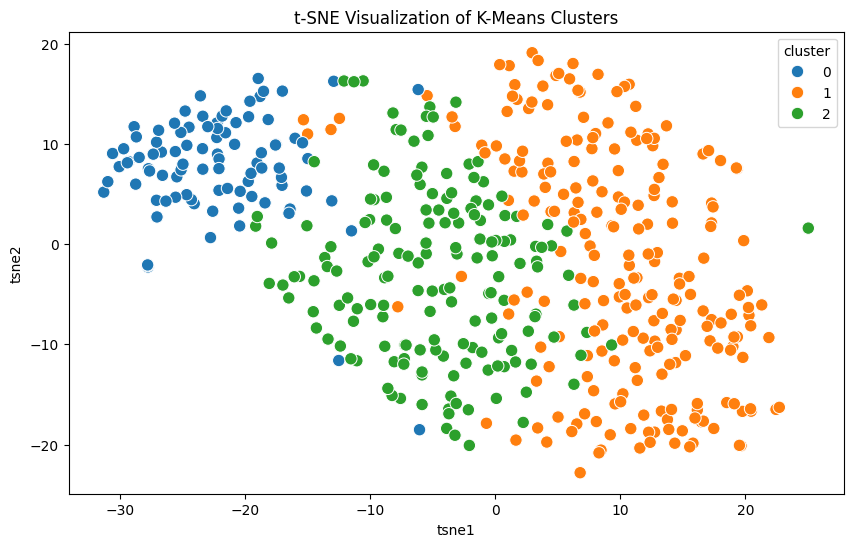


Cluster Summary (Average Feature Values):

               age    gender  relationship  Occupation Status  \
cluster                                                         
0        41.439560  0.582418      1.923077           1.000000   
1        23.364444  0.404444      2.404444           2.573333   
2        21.472727  0.490909      2.600000           2.642424   

         use social media  average time spend on social media  \
cluster                                                         
0                0.967033                            1.549451   
1                1.000000                            3.124444   
2                1.000000                            2.181818   

         using Social media without a specific purpose  \
cluster                                                  
0                                             2.835165   
1                                             4.071111   
2                                             3.242424   

         dist

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


# -------------------------------
# 2. Encode categorical columns
# -------------------------------
label_cols = [
    'gender',
    'relationship',
    'Occupation Status',
    'use social media',
    'average time spend on social media'
]

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# -------------------------------
# 3. Scale all columns
# -------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# -------------------------------
# 4. Elbow Method to find optimal K
# -------------------------------
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.show()

# -------------------------------
# 5. Apply K-Means with chosen K
# -------------------------------
optimal_k = 3   # You can adjust after seeing elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

# -------------------------------
# 6. PCA Visualization (2D)
# -------------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)
df['pca1'] = reduced[:, 0]
df['pca2'] = reduced[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette='Set2', s=80)
plt.title('K-Means Clustering (PCA 2D Projection)')
plt.show()

# -------------------------------
# 7. t-SNE Visualization (optional, better separation)
# -------------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(scaled_data)
df['tsne1'], df['tsne2'] = tsne_results[:, 0], tsne_results[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df, palette='tab10', s=80)
plt.title('t-SNE Visualization of K-Means Clusters')
plt.show()

# -------------------------------
# 8. Cluster-wise Summary
# -------------------------------
cluster_summary = df.groupby('cluster').mean(numeric_only=True)
print("\nCluster Summary (Average Feature Values):\n")
print(cluster_summary)

In [28]:
cluster_names = {
    0: 'Mature Light Users',
    1: 'Highly Addicted Youth',
    2: 'Moderate Student Users'
}

df['cluster_name'] = df['cluster'].map(cluster_names)


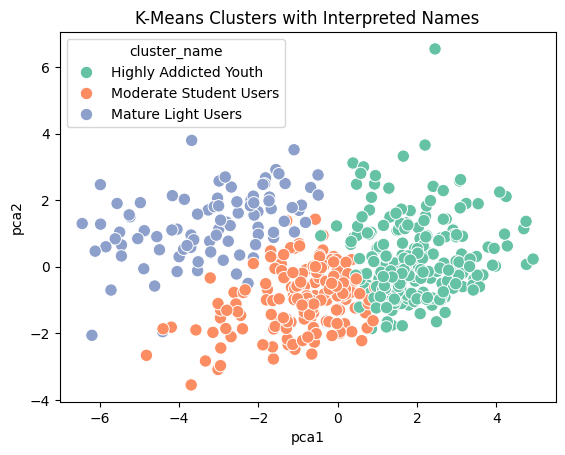

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='pca1', y='pca2', hue='cluster_name', data=df, palette='Set2', s=80)
plt.title('K-Means Clusters with Interpreted Names')
plt.show()
